In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy
from sklearn.cluster import KMeans

In [2]:
impage_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(impage_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

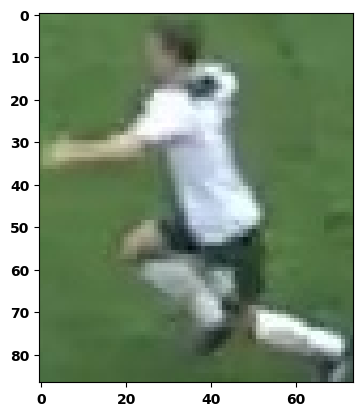

In [7]:
plt.imshow(image);

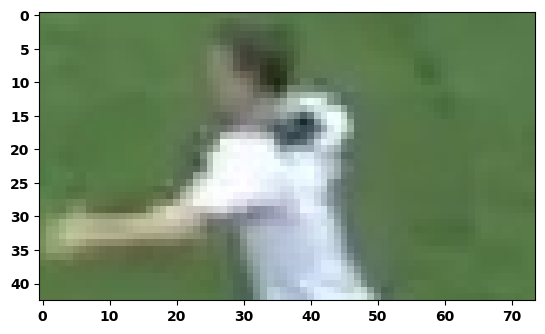

In [9]:
#now we take the top half of the image
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image);

## Cluster the iamge into 2 cluster

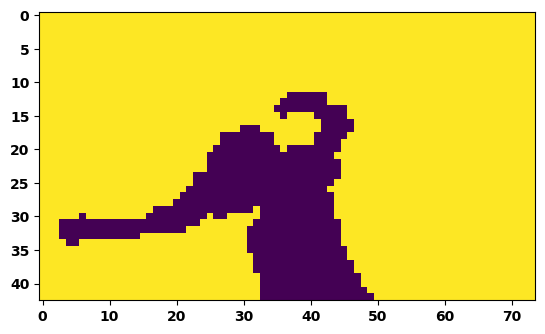

In [22]:
#rechape the image into 2d array
image_2d = top_half_image.reshape(-1,3)

#performs k=means clustering with 2 clusters
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

#get the cluster labels
labels = kmeans.labels_

#rechape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#display the cluster image
plt.imshow(clustered_image)


## now to know wich is the label that we won't need..

In [31]:
corner_cluster = [clustered_image[0,0],
                  clustered_image[0,-1],
                  clustered_image[-1,0],
                  clustered_image[-1,-1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print(non_player_cluster)

1


In [33]:
player_cluster = non_player_cluster - 1
print(player_cluster)

0


In [35]:
kmeans.cluster_centers_[player_cluster]

array([198.88826816, 208.89944134, 211.48789572])

In [36]:
kmeans.cluster_centers_[non_player_cluster]

array([ 90.85141777, 119.01247637,  77.34177694])